In [15]:
## Importing Libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer, LabelEncoder

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [16]:
wbcd = pd.read_csv("breast_cancer_dataset.csv").iloc[:,:32]
wbcd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
#check for null or NAN values
wbcd.isna().sum()
#so, all values are present , no value is NAN

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

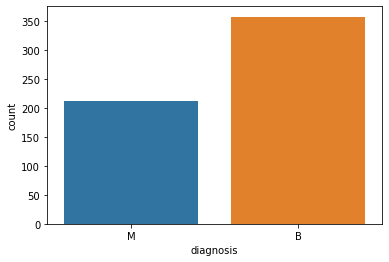

In [19]:
#plot the label values
plot= sns.countplot(x ="diagnosis",  data = wbcd)

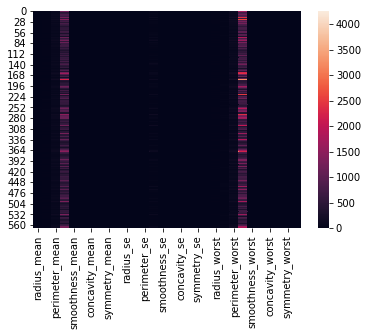

In [20]:
plot = sns.heatmap(wbcd.iloc[:,2:])

In [21]:
# select input and labels from dataframe
X_data = wbcd.iloc[:,2:].values
y_data = wbcd.iloc[:,1].to_frame()

#one hot encode the label values
ohe = pd.get_dummies(y_data)
y_data = y_data.join(ohe)
del y_data["diagnosis"]

#Splitting into test and train set
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2)


In [22]:
# Min Max Scaling of input features
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [23]:
#Build the model
import keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss ='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [24]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32 , validation_split = 0.2)

Epoch 1/100
12/12 [==============================] - 0s 23ms/step - loss: 0.2521 - accuracy: 0.4643 - val_loss: 0.2424 - val_accuracy: 0.7363
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2288 - accuracy: 0.7225 - val_loss: 0.2181 - val_accuracy: 0.9011
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2069 - accuracy: 0.8544 - val_loss: 0.1845 - val_accuracy: 0.9011
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1792 - accuracy: 0.8874 - val_loss: 0.1534 - val_accuracy: 0.9231
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1547 - accuracy: 0.8764 - val_loss: 0.1294 - val_accuracy: 0.9231
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1310 - accuracy: 0.8984 - val_loss: 0.1034 - val_accuracy: 0.9341
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1086 - accuracy: 0.9121 - val_loss: 0.0846 - val_accuracy: 0.9341
Epoch 

12/12 [==============================] - 0s 11ms/step - loss: 0.0173 - accuracy: 0.9835 - val_loss: 0.0225 - val_accuracy: 0.9670
Epoch 59/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.9863 - val_loss: 0.0218 - val_accuracy: 0.9670
Epoch 60/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0174 - accuracy: 0.9863 - val_loss: 0.0227 - val_accuracy: 0.9670
Epoch 61/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0168 - accuracy: 0.9863 - val_loss: 0.0226 - val_accuracy: 0.9670
Epoch 62/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0166 - accuracy: 0.9890 - val_loss: 0.0212 - val_accuracy: 0.9670
Epoch 63/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0164 - accuracy: 0.9835 - val_loss: 0.0229 - val_accuracy: 0.9670
Epoch 64/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0166 - accuracy: 0.9863 - val_loss: 0.0216 - val_accuracy: 0.9670
Epoch 65/100

In [25]:
score = model.evaluate(X_test,y_test)
print("Accuracy :", score[1]*100)


4/4 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9825
Accuracy : 98.24561476707458
